In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,f1_score,classification_report,precision_score,recall_score
from sklearn import svm
from sklearn.neural_network import MLPClassifier
import networkx as nx
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import AdaBoostClassifier,RandomForestClassifier
from collections import Counter
from sklearn.neighbors import KNeighborsClassifier


# Dataset

Reading the CSV file:

In [2]:
root = "D:\Drive I\IUST\8th term\AI Dr.Salehi\project\churn.csv"

In [3]:
df = pd.read_csv(root)

Here we remove nans from the dataframe:

In [4]:
df_1 = df.dropna()

Modifying the dataframe:

In [5]:
df_2 = df_1.replace('No phone service','No')

In [6]:
df_3 = df_2.replace('No internet service','No')

Remove the row which have empty cells:

In [7]:
def remove_rows_with_empty_strings(df):
    
    # Step 1: Identify rows with empty strings
    mask = df.applymap(lambda x: x == ' ')

    # Step 2: Filter out rows that have any empty strings
    rows_with_empty_strings = mask.any(axis=1)

    # Step 3: Remove rows that have any empty strings
    df_cleaned = df[~rows_with_empty_strings]

    return df_cleaned

In [8]:
df_4 = remove_rows_with_empty_strings(df_3)

C:\Users\asus\AppData\Local\Temp\ipykernel_5948\1516935728.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  mask = df.applymap(lambda x: x == ' ')


Choose 1300 rows of dataframe:

In [9]:
df_cleaned = df_4.sample(n=1300,random_state=42)

In [10]:
df_cleaned

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2481,6614-YWYSC,Male,1,Yes,No,61,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Bank transfer (automatic),25.00,1501.75,No
6784,9546-KDTRB,Female,0,No,No,19,Yes,Yes,No,No,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),24.70,465.85,No
6125,0871-URUWO,Male,0,Yes,No,13,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359,Yes
3052,5151-HQRDG,Male,0,Yes,No,37,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75,No
4099,6624-JDRDS,Female,0,No,No,6,No,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2933-XEUJM,Female,0,No,No,46,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,79.20,3593.8,No
3821,1833-VGRUM,Female,1,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.20,74.2,Yes
2547,7963-SHNDT,Female,0,No,No,52,No,No,DSL,Yes,...,No,Yes,No,No,Two year,No,Mailed check,39.10,1982.1,No
6518,1963-SVUCV,Male,0,No,No,1,Yes,No,DSL,No,...,No,No,No,No,Month-to-month,No,Electronic check,45.30,45.3,Yes


Converting the strings to integer:

In [11]:
def str_to_int(data):
  for col in data.columns:
    for i,item in enumerate(data[col]):
      if isinstance(item,str):
        try:
          data.at[i,col] = int(item)
          data.at[i,col] = float(item)
        except ValueError:
          if data[col].dtype == "object":
            labels, _= pd.factorize(data[col])
            data[col] = labels

  return data

In [12]:
df_cleaned_1 = str_to_int(df_cleaned)

In [13]:
dataframe=df_cleaned_1.dropna()

In [14]:
dataframe

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
2481,0.0,0.0,1.0,0.0,0.0,61.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.00,0.0,0
6784,1.0,1.0,0.0,1.0,0.0,19.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,24.70,1.0,0
6125,2.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,1.0,1.0,1.0,102.25,2.0,1
3052,3.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,2.0,55.05,3.0,0
4099,4.0,1.0,0.0,1.0,0.0,6.0,1.0,1.0,2.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29.45,4.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,1295.0,1.0,0.0,1.0,0.0,46.0,0.0,0.0,2.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,2.0,79.20,1267.0,0
3821,1296.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,3.0,74.20,1268.0,1
2547,1297.0,1.0,0.0,1.0,0.0,52.0,1.0,1.0,2.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,2.0,39.10,1269.0,0
6518,1298.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,3.0,45.30,1270.0,1


Determine x and y in dataframe:

In [15]:
#The last column (target) is the output
X = dataframe.drop(["customerID","Churn"],axis=1)
y = dataframe["Churn"]

In [16]:
X.shape,y.shape

((1300, 19), (1300,))

Split test and train


In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size = 0.2,random_state = 42)

# SVM method

In [18]:
svm_classifier = svm.SVC()

Define the hyperparameter grid to Get the best hyperparameters:


In [19]:
param_grid = {'C':range(2,30),'gamma': [0,0.1,5]}
grid_search = GridSearchCV(svm_classifier,param_grid,cv=5)
grid_search.fit(X_train,y_train)

best_C = grid_search.best_params_['C']
best_gamma = grid_search.best_params_['gamma']

In [20]:
grid_search.best_params_

{'C': 7, 'gamma': 0.1}

In [21]:
clf_svm = svm.SVC(gamma=best_gamma,C=best_C)

clf_svm.fit(X_train,y_train)

SVC(C=7, gamma=0.1)

In [22]:
y_pred_svm = clf_svm.predict(X_test)

In [23]:
accuracy_svm = accuracy_score(y_test,y_pred_svm)
print(f"Accuracy in SVM is  equal to : {accuracy_svm:.2f}")

Accuracy in SVM is  equal to : 0.70


In [24]:
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82       181
           1       1.00      0.01      0.03        79

    accuracy                           0.70       260
   macro avg       0.85      0.51      0.42       260
weighted avg       0.79      0.70      0.58       260



# Decision tree method

In [25]:
clf_decision_tree = DecisionTreeClassifier(criterion="entropy",max_depth=5)


clf_decision_tree.fit(X_train,y_train)

#Evaluation of accuracy
y_pred_decision_tree = clf_decision_tree.predict(X_test)
accuracy_decision_tree = accuracy_score(y_test,y_pred_decision_tree)

In [26]:
print(f"Accuracy in decision tree is equal to : {accuracy_decision_tree:.2f}")

Accuracy in decision tree is equal to : 0.72


Plot the Decision tree


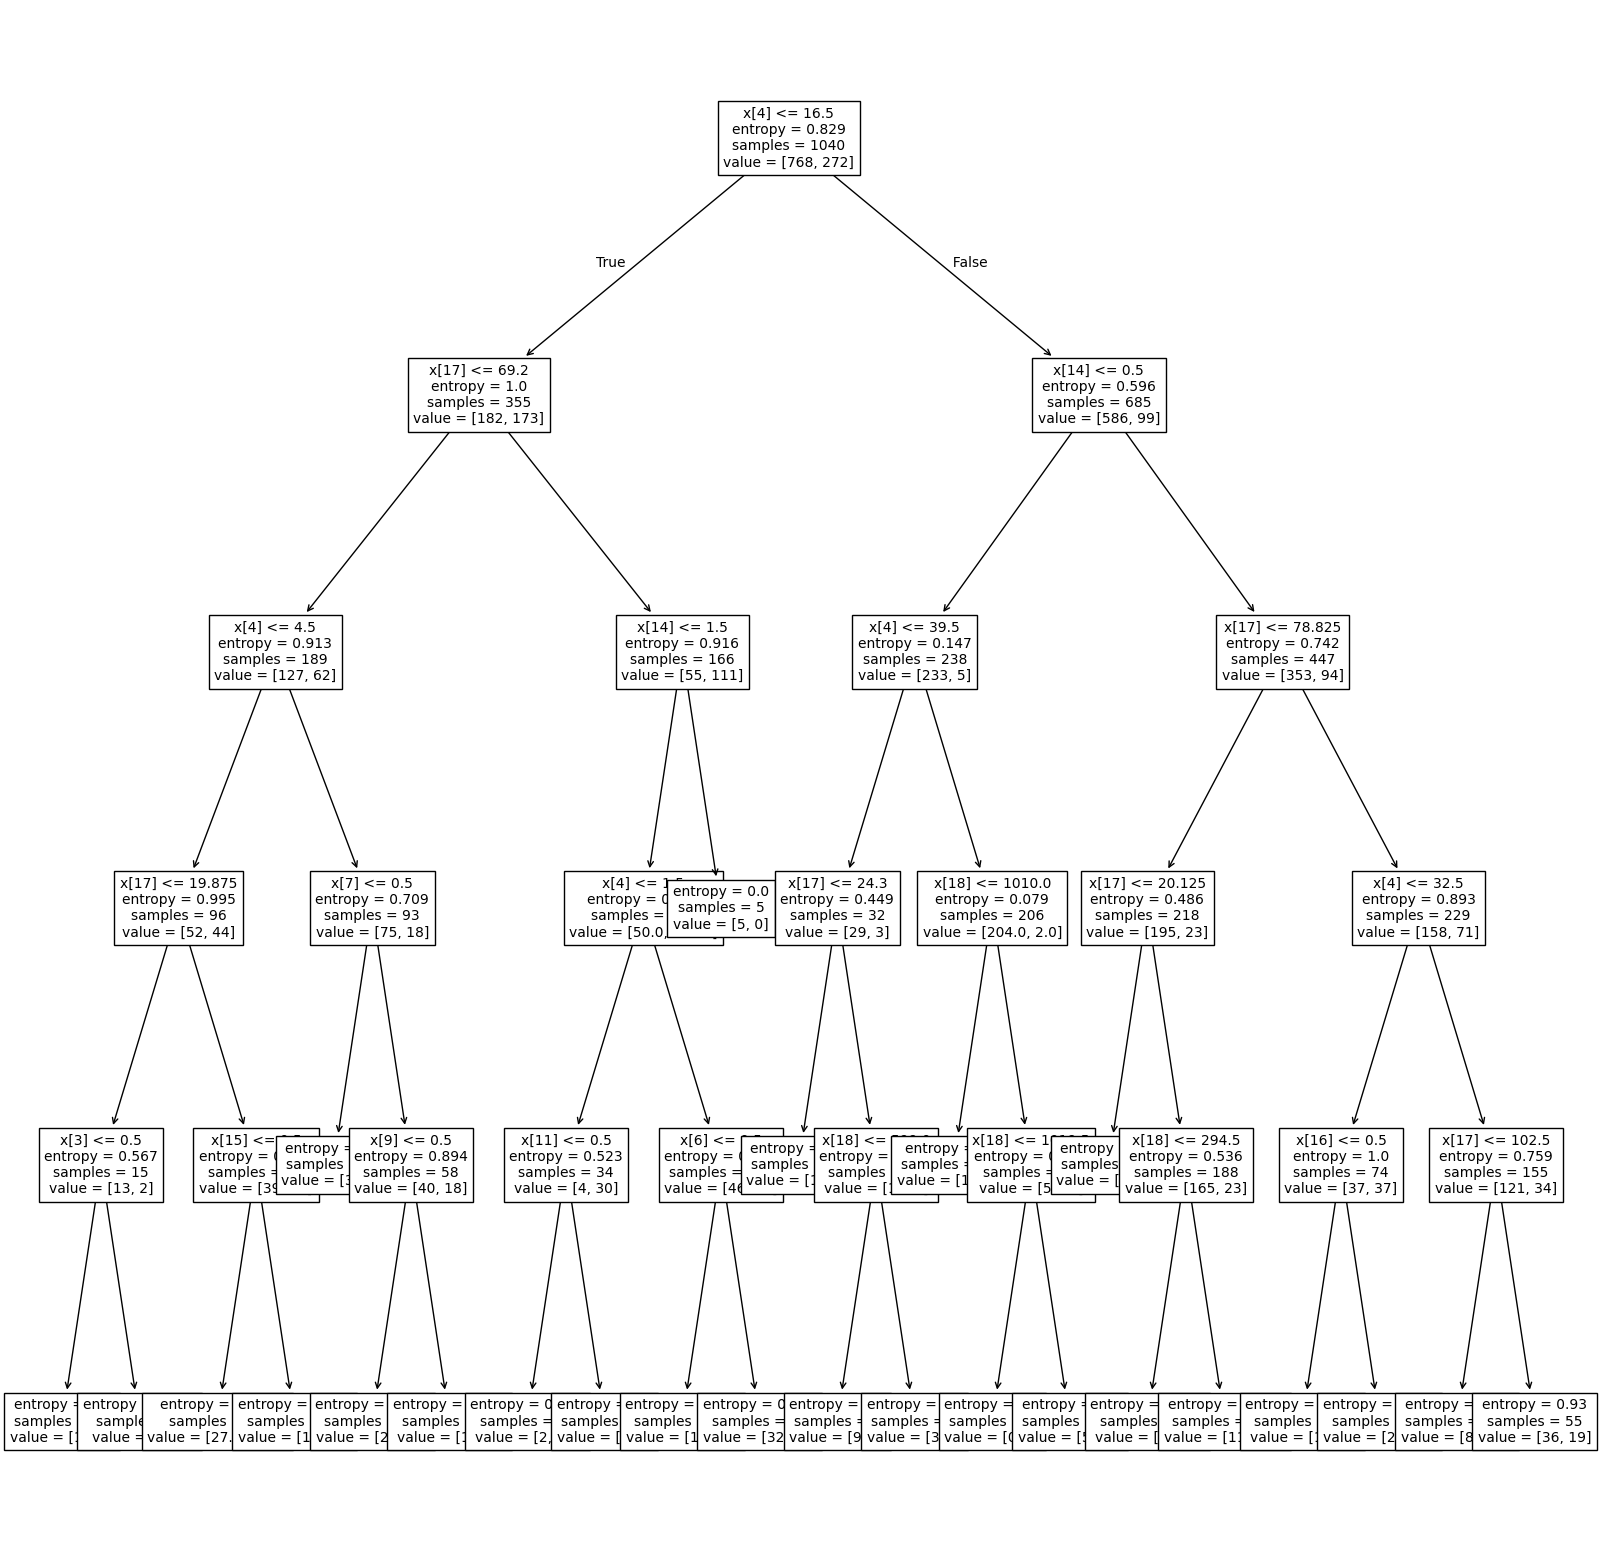

In [27]:
plt.figure(figsize=(20,20))
plot_tree(clf_decision_tree,fontsize=10)
plt.show()


In [28]:
print(classification_report(y_test,y_pred_decision_tree))

              precision    recall  f1-score   support

           0       0.79      0.81      0.80       181
           1       0.55      0.52      0.53        79

    accuracy                           0.72       260
   macro avg       0.67      0.67      0.67       260
weighted avg       0.72      0.72      0.72       260



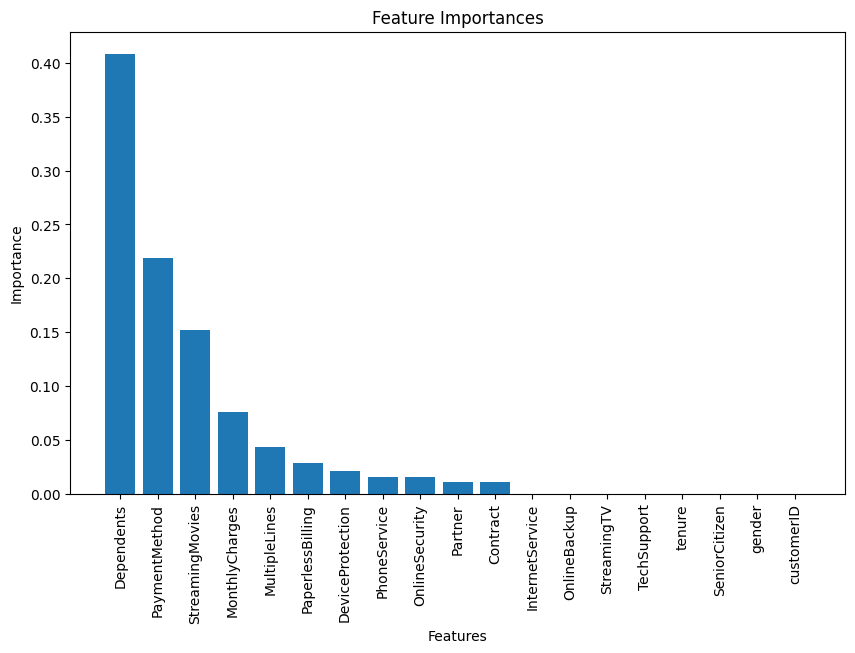

In [29]:
importances = clf_decision_tree.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]),importances[indices],align='center')
plt.xticks(range(X.shape[1]),[dataframe.columns[i] for i in indices],rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

Using adaboost method for decision tree:

In [30]:
#Define base estimator
first_estimator = DecisionTreeClassifier(max_depth=5)
# AdaBoost classifier
clf_adaboost = AdaBoostClassifier(estimator=first_estimator,n_estimators=1000,learning_rate=1,random_state=42)
clf_adaboost.fit(X_train,y_train)

d:\Drive I\IUST\8th term\AI Dr.Salehi\project\virtual_enviroment\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                   learning_rate=1, n_estimators=1000, random_state=42)

In [31]:
y_pred_decision_tree_adaboost = clf_adaboost.predict(X_test)
accuracy_decision_tree_adaboost = accuracy_score(y_test,y_pred_decision_tree_adaboost)
print(f"Accuracy in decision tree with Adaboost method is equal to : {accuracy_decision_tree_adaboost:.2f}")

Accuracy in decision tree with Adaboost method is equal to : 0.75


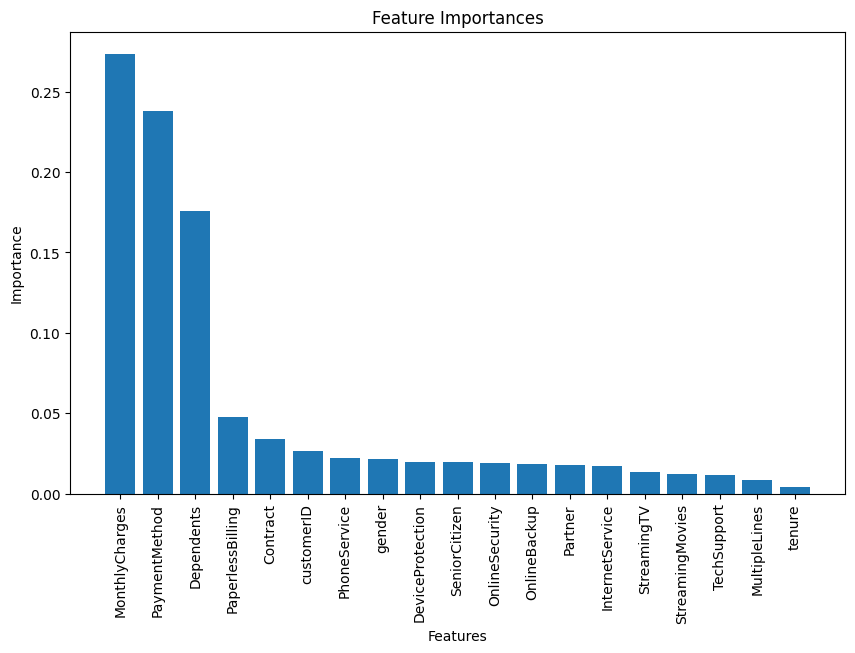

In [32]:
importances = clf_adaboost.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]),importances[indices],align='center')
plt.xticks(range(X.shape[1]),[dataframe.columns[i] for i in indices],rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

# Random forest classifier

In [33]:
clf_random_forest = RandomForestClassifier(n_estimators=100,max_depth=5,random_state=42)
clf_random_forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [34]:
y_pred_random_forest = clf_random_forest.predict(X_test)
accuracy_random_forest = accuracy_score(y_test,y_pred_random_forest)
print(f"Accuracy in random forest is equal to : {accuracy_random_forest:.2f}")

Accuracy in random forest is equal to : 0.76


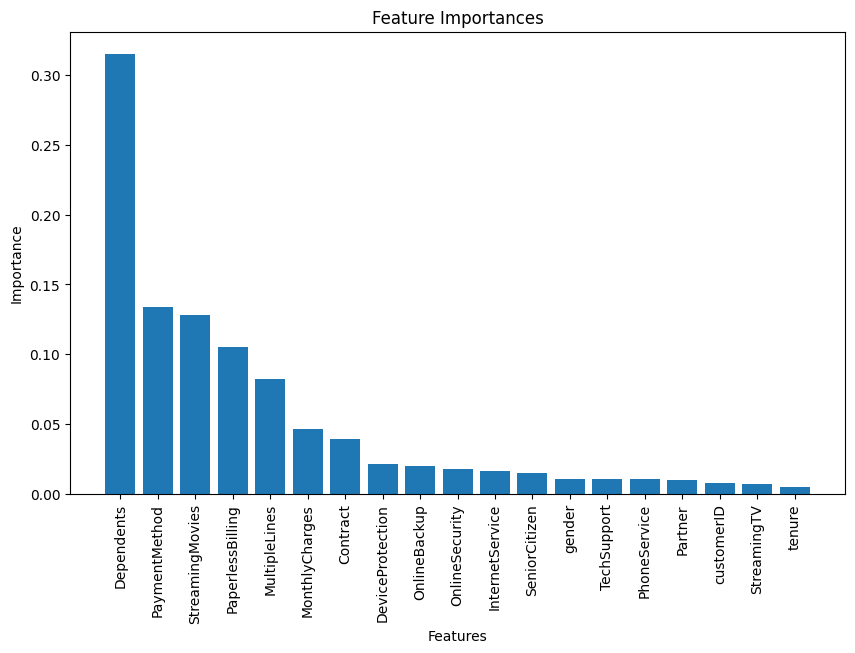

In [35]:
importances = clf_random_forest.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(X.shape[1]),importances[indices],align='center')
plt.xticks(range(X.shape[1]),[dataframe.columns[i] for i in indices],rotation=90)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

Plot the random forest

C:\Users\asus\AppData\Local\Temp\ipykernel_5948\3343308580.py:11: UserWarning: Tight layout not applied. tight_layout cannot make Axes width small enough to accommodate all Axes decorations
  plt.tight_layout()


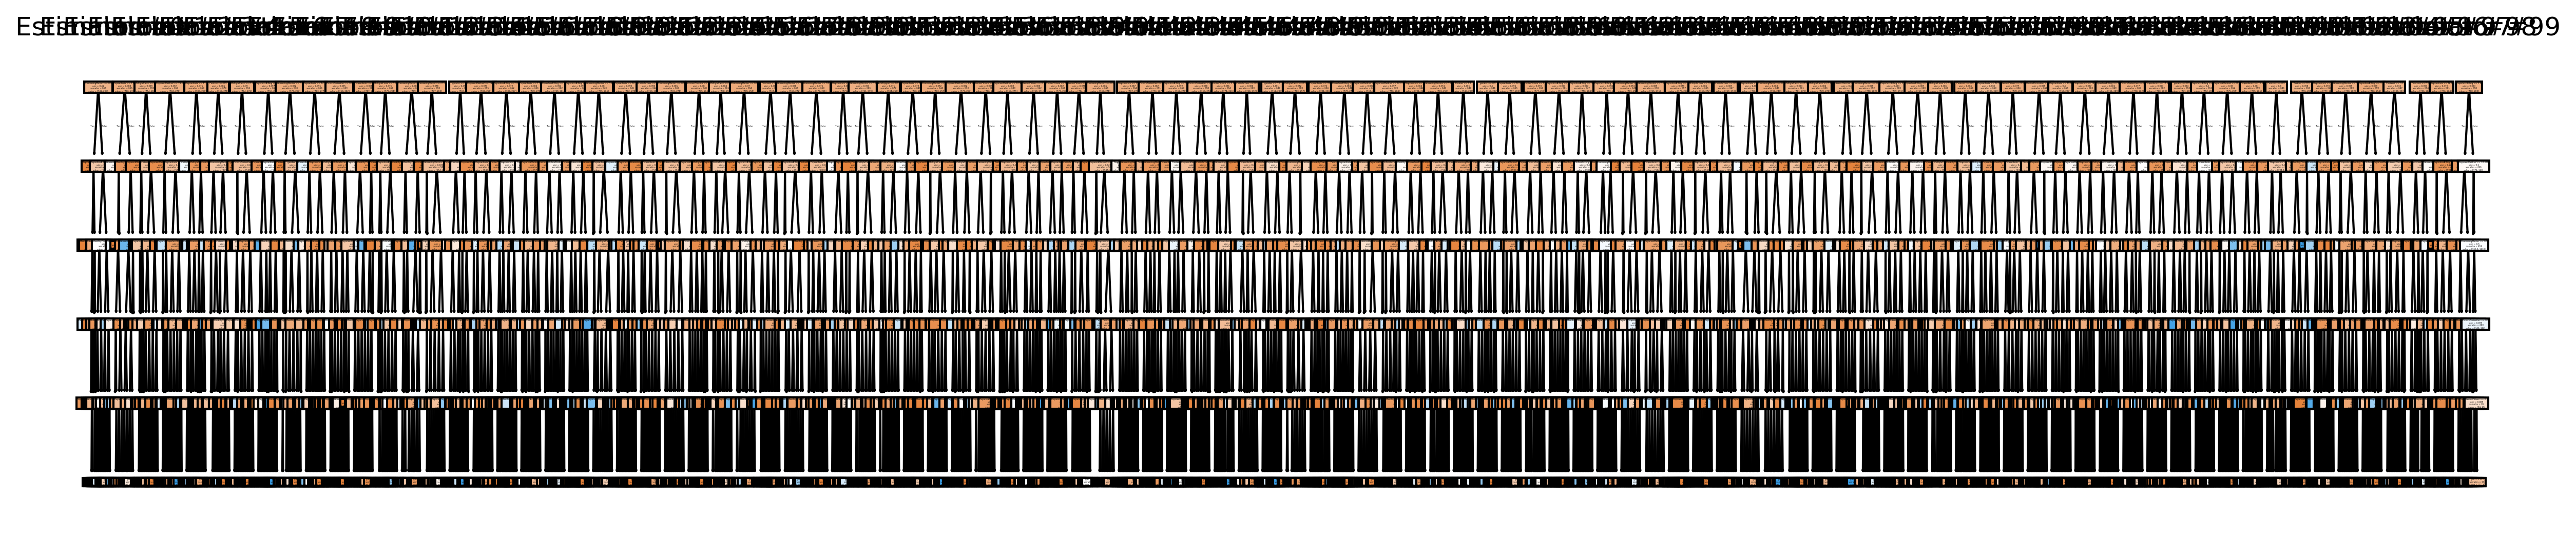

In [36]:
n_trees = len(clf_random_forest.estimators_)

# Plot each tree
fig, axes = plt.subplots(nrows=1,ncols=n_trees,figsize=(20,4),dpi=300)

for idx, estimator in enumerate(clf_random_forest.estimators_):
    ax = axes[idx]
    plot_tree(estimator,feature_names=dataframe.columns,filled=True,ax=ax)
    ax.set_title(f"Estimator #{idx}")

plt.tight_layout()
plt.show()

# Neural network method

Using gridsearch to fing best parameters in neural network.

In [37]:
mlp = MLPClassifier()
param_grid = {'hidden_layer_sizes': [(20,),(20,10,5,3),(10,7,4),(20,3,10)],'activation': ['identity','logistic','relu','tanh'],'solver': ['adam','sgd''lbfgs'],'learning_rate':['constant','invscaling','adaptive']}
grid_search = GridSearchCV(mlp,param_grid,cv=5)
grid_search.fit(X_train, y_train)

best_hidden_layer_sizes = grid_search.best_params_['hidden_layer_sizes']
best_activation = grid_search.best_params_['activation']
best_solver=grid_search.best_params_['solver']
best_learning_rate=grid_search.best_params_['learning_rate']

d:\Drive I\IUST\8th term\AI Dr.Salehi\project\virtual_enviroment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Drive I\IUST\8th term\AI Dr.Salehi\project\virtual_enviroment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Drive I\IUST\8th term\AI Dr.Salehi\project\virtual_enviroment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
d:\Drive I\IUST\8th term\AI Dr.Salehi\project\virtual_enviroment\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maxim

In [38]:
print(best_hidden_layer_sizes)
print(best_activation)
print(best_solver)
print(best_learning_rate)

(20,)
logistic
adam
adaptive


In [39]:
mlp = MLPClassifier(activation=best_activation,solver=best_solver,learning_rate=best_learning_rate,max_iter=8000,random_state=42,hidden_layer_sizes=best_hidden_layer_sizes)
mlp.fit(X_train, y_train)

MLPClassifier(activation='logistic', hidden_layer_sizes=(20,),
              learning_rate='adaptive', max_iter=8000, random_state=42)

In [40]:
y_pred_NN = mlp.predict(X_test)
accuracy_neural_network = accuracy_score(y_test,y_pred_NN)
print(f"Accuracy in neural network is equal to : {accuracy_neural_network:.2f}")

Accuracy in neural network is equal to : 0.74


In [41]:
print(classification_report(y_test,y_pred_NN))

              precision    recall  f1-score   support

           0       0.79      0.85      0.82       181
           1       0.59      0.49      0.54        79

    accuracy                           0.74       260
   macro avg       0.69      0.67      0.68       260
weighted avg       0.73      0.74      0.74       260



Function to plot Neural network.


In [42]:
def plot_mlp_structure(mlp,input_size):
    layers = [input_size] + list(mlp.hidden_layer_sizes) + [1]  # Add input and output layers

    G = nx.DiGraph()
    node_count = 0
    layer_nodes = []

    # Create nodes for each layer
    for i, layer_size in enumerate(layers):
        layer_nodes.append([])
        for _ in range(layer_size):
            G.add_node(node_count,layer=i)
            layer_nodes[-1].append(node_count)
            node_count += 1

    # Create edges between nodes of subsequent layers
    for i in range(len(layer_nodes)-1):
        for node in layer_nodes[i]:
            for next_node in layer_nodes[i + 1]:
                G.add_edge(node,next_node)

    pos = {}
    for i, layer in enumerate(layer_nodes):
        for j, node in enumerate(layer):
            pos[node] = (i, j - len(layer) / 2)

    plt.figure(figsize=(12,8))
    nx.draw(G,pos,with_labels=False,node_size=500,node_color="skyblue",edge_color="gray")
    labels = {i: f"Input {i+1}" for i in range(input_size)}
    hidden_layers = sum([[f"H{j+1}" for j in range(size)] for size in mlp.hidden_layer_sizes],[])
    labels.update({i + input_size: hidden_layers[i] for i in range(len(hidden_layers))})
    labels.update({node_count - 1: "Output"})
    nx.draw_networkx_labels(G,pos,labels,font_size=10)
    plt.title("MLPClassifier Structure")
    plt.show()



Plot the structure

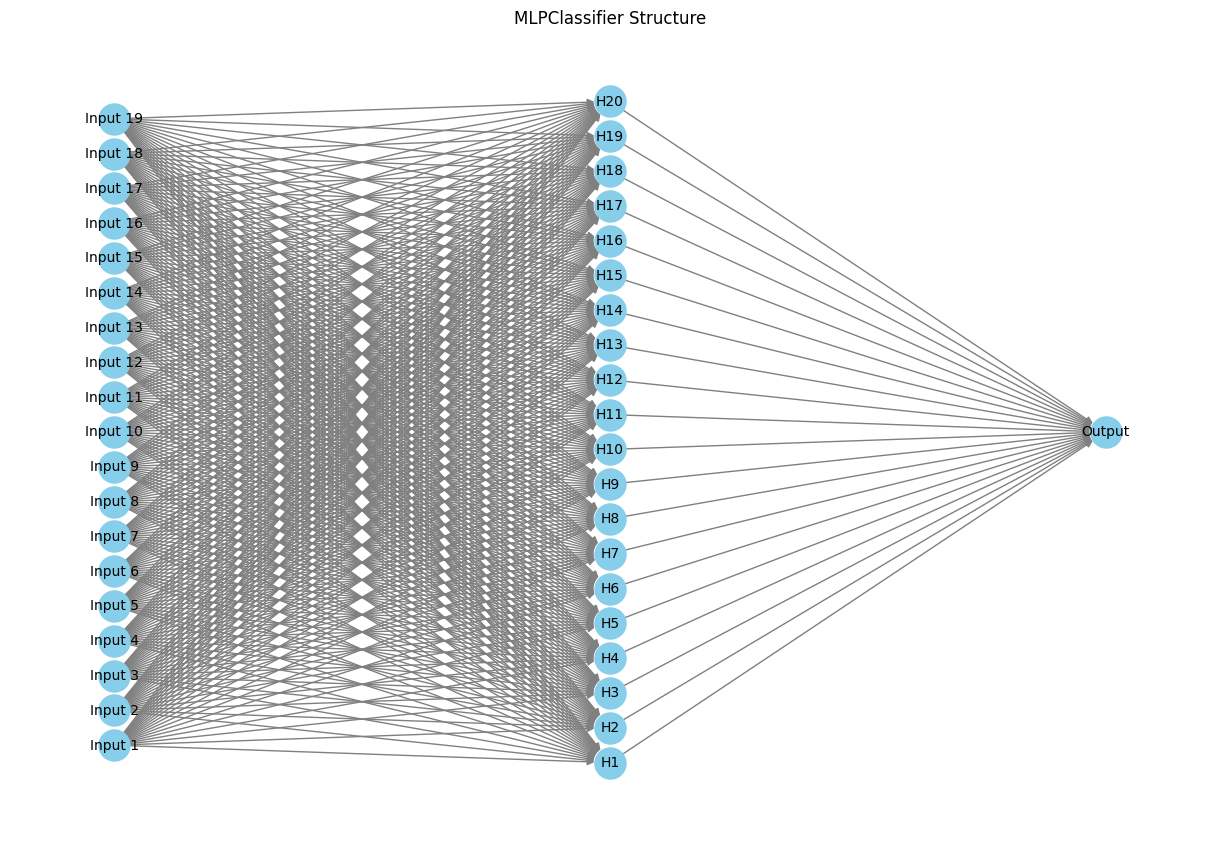

In [43]:
plot_mlp_structure(mlp,X.shape[1])

# Kmeans clustering 

In [44]:
Scaler=StandardScaler()
dataframe_1=Scaler.fit_transform(dataframe)

In [45]:
pca=PCA(n_components=2)
pca.fit(dataframe_1)

dataframe_2= pca.transform(dataframe_1)
dataframe_2.shape

(1300, 2)

Scale data

In [46]:
X = dataframe_2

Elbow method for choosing K:


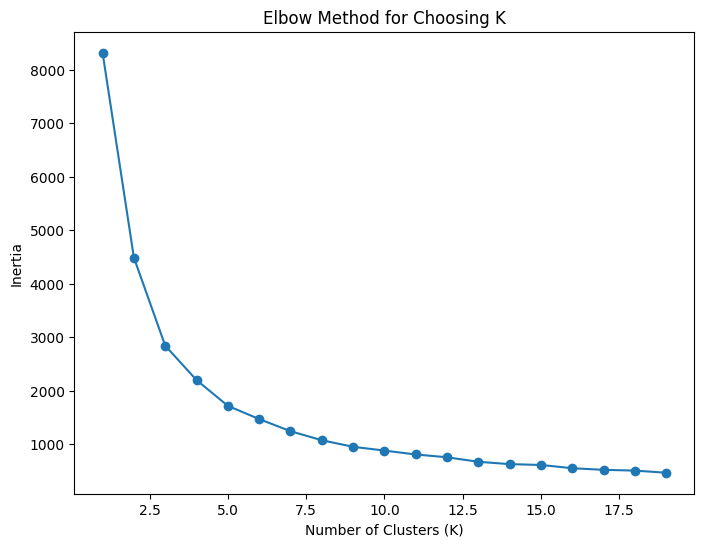

In [47]:
inertias = []
for k in range(1,20):
    kmeans = KMeans(n_clusters=k,random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(8,6))
plt.plot(range(1,20),inertias,marker='o')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Choosing K')
plt.show()

The plot shows that the best number of clustering is 12.


In [48]:
kmeans = KMeans(n_clusters=12,random_state=42)
kmeans.fit(X)

KMeans(n_clusters=12, random_state=42)

Visualize the clustering

In [49]:
X.shape

(1300, 2)

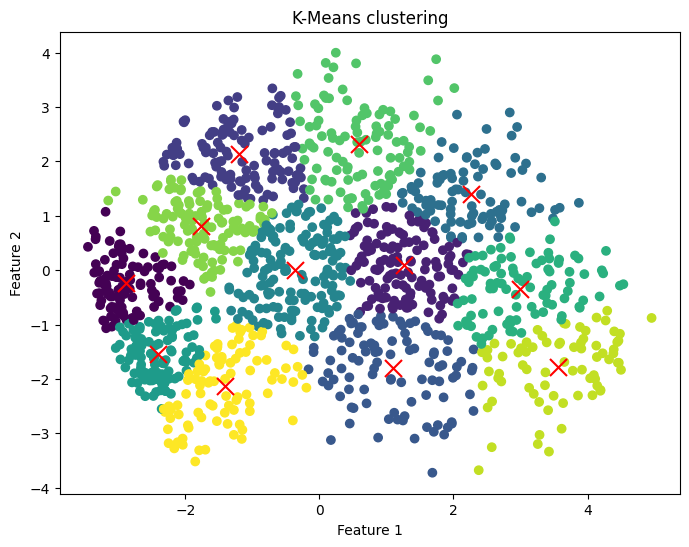

In [50]:
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],marker='x',c='r',s=150)
plt.title('K-Means clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

# KNN algorithm

The k-nearest neighbors (KNN) algorithm is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point.

In [51]:
# Splitting the data into features and labels
X = dataframe.drop(["customerID","Churn"],axis=1)
y = dataframe["Churn"]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': range(2,20)}
grid_search = GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(X_train,y_train)

best_k = grid_search.best_params_['n_neighbors']

knn = KNeighborsClassifier(n_neighbors=best_k)
# Fitting the model
knn.fit(X_train,y_train)

# Making predictions
y_pred_knn = knn.predict(X_test)

# Calculating accuracy
accuracy_knn = accuracy_score(y_test,y_pred_knn)
print(f"Accuracy of KNN with k={k} is equal to: {accuracy_knn:.2f}")

Accuracy of KNN with k=19 is equal to: 0.72
